# Using a domain map to model an unconformity

We discussed the aspect of combining different scalar fields, for example to model the effect of an unconformity (i.e. in cases where we can not model the geological setting anymore easily with a single continous scalar field).

In these cases, we first generate a "domain map", i.e. a map which depicts which geological features exist in different regions of space. As a first example, we generate here a map of an unconformity and show how a joint feature field can be interpolated with a suitable combination of multiple separate scalar fields.

In [15]:
import numpy as np
from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

# for least square solution to line
from numpy.linalg import lstsq

plt.rcParams['figure.figsize'] = (8., 6.)
plt.rcParams['font.size'] = 16.

## Geological setting

Let's assume that we have observations of interfaces for two simple "layer stacks":

In [31]:
n_pts = 10 # Points per layer

# lower stack:

# Linear functions for line data
l1 = lambda x : -0.4*x + 30
l2 = lambda x : -0.4*x + 40
l3 = lambda x : -0.4*x + 50

# set seed for reproducibility
np.random.seed(123)
# sampling points
l1_pts_x = np.random.uniform(0,100,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(20,100,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(40,100,n_pts)
l3_pts_y = l3(l3_pts_x)

# upper stack:
# Linear functions for line data
l4 = lambda x : 0.25*x + 30
l5 = lambda x : 0.25*x + 40
l6 = lambda x : 0.25*x + 50

# set seed for reproducibility
np.random.seed(123)
# sampling points
l4_pts_x = np.random.uniform(40,100,n_pts)
l4_pts_y = l4(l4_pts_x)
l5_pts_x = np.random.uniform(30,100,n_pts)
l5_pts_y = l5(l5_pts_x)
l6_pts_x = np.random.uniform(20,100,n_pts)
l6_pts_y = l6(l6_pts_x)

And a plot for visualization:

(0, 100)

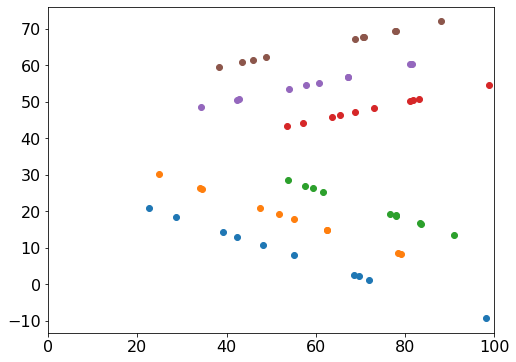

In [32]:
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')
plt.plot(l4_pts_x, l4_pts_y, 'o')
plt.plot(l5_pts_x, l5_pts_y, 'o')
plt.plot(l6_pts_x, l6_pts_y, 'o')
plt.xlim([0,100])

First important questions:

- what are the two basic options in which we can combine this data?
- what would be the according geological interpretations?